In [1]:
import os
import numpy as np
from nibabel.testing import data_path 

import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
import nibabel as nib
from deepbrain import Extractor

In [3]:
filename = '../ppmi/cd-pd/PPMI/3309/T1-anatomical/2012-01-12_11_42_07.0/S142552/PPMI_3309_MR_T1-anatomical_Br_20120905200122349_S142552_I331028.nii'

In [5]:
img = nib.load(filename)
img_data = img.get_fdata()
img_data.shape

(176, 240, 256)

In [6]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower")

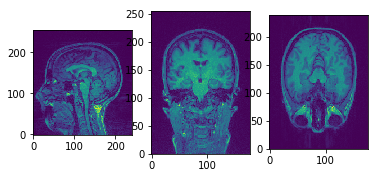

In [7]:
slice_0 = img_data[88, :, :]
slice_1 = img_data[:, 120, :]
slice_2 = img_data[:, :, 128]
show_slices([slice_0, slice_1, slice_2])

In [8]:
ext = Extractor()
prob = ext.run(img_data)

Instructions for updating:
Use tf.gfile.GFile.


In [23]:
mask = prob < 0.5

In [24]:
# def extract(slice, mask):
#     for i in range(len(slice)):
#         for j in range(len(slice[0])):
#             if not mask[i][j]:
#                 slice[i][j] = 0
#     return slice

def show_extracted_slices(slices, masks):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        slice[masks[i]] = 0
        axes[i].imshow(slice.T, origin="lower")

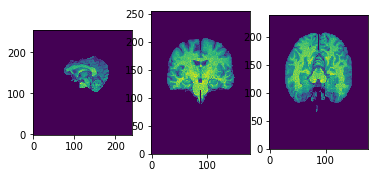

In [29]:
mask_0 = mask[90, :, :]
mask_1 = mask[:, 120, :]
mask_2 = mask[:, :, 128]
show_extracted_slices([slice_0, slice_1, slice_2], [mask_0, mask_1, mask_2])

In [70]:
def mri_scans(path_list):
    for path in path_list:
        img = nib.load(filename)
        img_data = img.get_fdata()
        
        print('extracting brain...')
        
        ext = Extractor()
        prob = ext.run(img_data)
        mask = prob < 0.5
        
        slice_0 = img_data[88, :, :]
        slice_1 = img_data[:, 120, :]
        slice_2 = img_data[:, :, 128]

        mask_0 = mask[88, :, :]
        mask_1 = mask[:, 120, :]
        mask_2 = mask[:, :, 128]
        
        show_extracted_slices([slice_0, slice_1, slice_2], [mask_0, mask_1, mask_2])

extracting brain...
extracting brain...


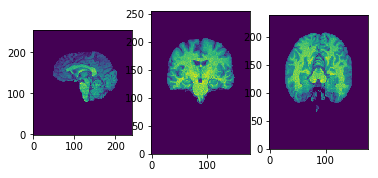

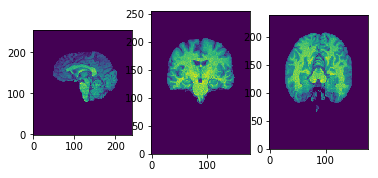

In [71]:
path1 = '../ppmi/cd-pd/PPMI/3102/T1-anatomical/2010-11-23_09_51_22.0/S103294/PPMI_3102_MR_T1-anatomical_Br_20120911162206099_S103294_I333354.nii'
path2 = '../ppmi/cd-pd/PPMI/3102/T1-anatomical/2013-02-06_10_38_32.0/S193426/PPMI_3102_MR_T1-anatomical_Br_20140123143920185_S193426_I406748.nii'

paths = [path1, path2]

mri_scans(paths)

extracting brain...
extracting brain...


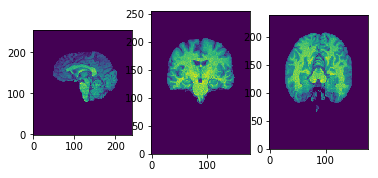

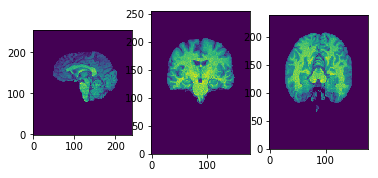

In [73]:
path1t2 = '../ppmi/cd-pd/PPMI/3102/T2_in_T1-anatomical_space/2010-11-23_09_51_22.0/S103294/PPMI_3102_MR_T2_in_T1-anatomical_space_Br_20120911162156988_S103294_I333353.nii'
path2t2 = '../ppmi/cd-pd/PPMI/3102/T2_in_T1-anatomical_space/2013-02-06_10_38_32.0/S193426/PPMI_3102_MR_T2_in_T1-anatomical_space_Br_20140123144232441_S193426_I406759.nii'

mri_scans([path1t2, path2t2])

extracting brain...
extracting brain...
extracting brain...
extracting brain...


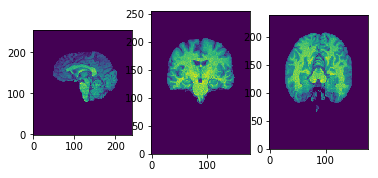

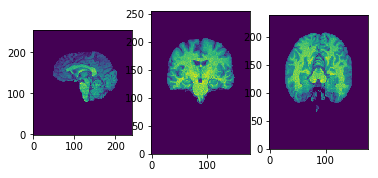

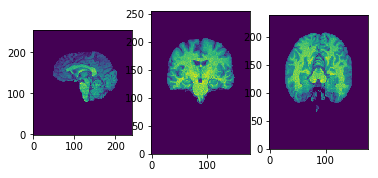

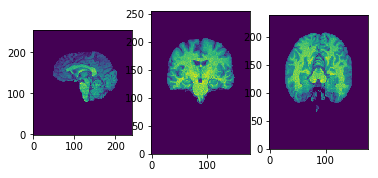

In [74]:
# 3105
path1 = '../ppmi/cd-pd/PPMI/3105/PPMI_3105_MR_T2_in_corrected_EPI_space_for_I226401_Br_20120321161438683_S103325_I291557.nii'
path2 = '../ppmi/cd-pd/PPMI/3105/PPMI_3105_MR_T2_in_corrected_EPI_space_for_I301560_Br_20120514134314958_S148998_I303506.nii'
path3 = '../ppmi/cd-pd/PPMI/3105/PPMI_3105_MR_T2_in_corrected_EPI_space_for_I301561_Br_20120514134607730_S148998_I303530.nii'
path4 = '../ppmi/cd-pd/PPMI/3105/PPMI_3105_MR_T2_in_corrected_EPI_space_for_I372315_Br_20140123143536338_S189363_I406732.nii'

mri_scans([path1, path2, path3, path4])